# 미국의 기준금리가 원/달러 환율 및 한국의 수·출입에 미치는 영향

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import platform


In [25]:
# 자료 출처
# 수출입총괄_202207200.xls : 수출입무역통계(https://unipass.customs.go.kr/ets/index.do)
# 주요국 통화의 대원화환율_19143334.csv : ECOS한국은행 경제통계시스템(https://ecos.bok.or.kr/#/)

## 수·출입

In [26]:
# 파일 불러오기
df=pd.read_excel('./Data/수출입총괄_202207200.xls',skiprows=4)


# 총계 지우기
df=df.drop(0).reset_index(drop=True)

# ['기간', '수출금액', '수입금액', '무역수지'] 컬럼만 추출
df2=df[df.columns[[0,2,4,5]]]


c:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [27]:
# 각 컬럼의 타입 변경 

for col in df2.columns[1:]:
    for i in range(df.shape[0]):
        df2[col][i]=df2[col][i].replace(',','')
    df2[col] = pd.to_numeric(df2[col])

df2

C:\Users\User\AppData\Local\Temp\ipykernel_6880\3391945598.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col][i]=df2[col][i].replace(',','')
C:\Users\User\AppData\Local\Temp\ipykernel_6880\3391945598.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = pd.to_numeric(df2[col])


,기간,수출금액,수입금액,무역수지
0,2019.01,46168934,45153389,1015545
1,2019.02,39481803,36651437,2830366
2,2019.03,47003206,41992349,5010857
3,2019.04,48781156,45047164,3733992
4,2019.05,45703948,43619667,2084281
5,2019.06,44008404,40104812,3903592
6,2019.07,46078221,43762245,2315976
7,2019.08,44020065,42457250,1562815
8,2019.09,44629053,38741473,5887580
9,2019.10,46648756,41396517,5252239


In [28]:
# 파일로 저장
df2.to_csv('월별 수출입금액 및 무역수지.csv')

In [29]:
# 한글 글꼴
if(platform.system() == 'Windows'):
    plt.rc('font', family = 'Malgun Gothic')

else:
    plt.rc('font', family = 'AppleGothic')

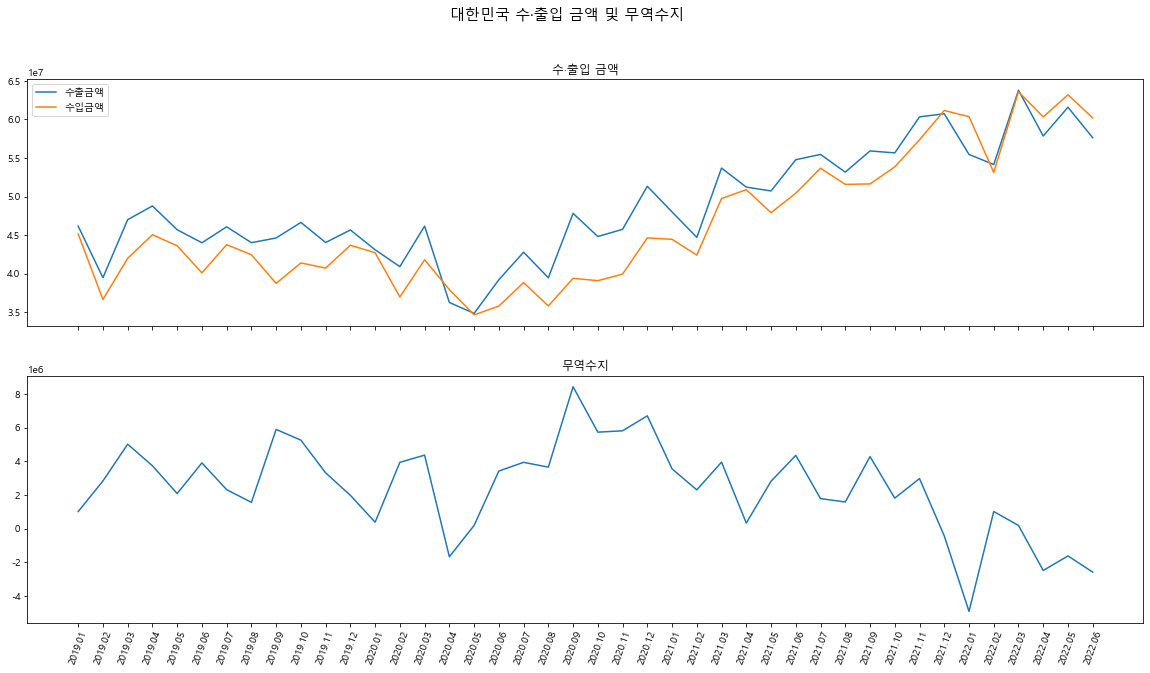

In [30]:
# 두 그래프

fig, axes = plt.subplots(2, 1, figsize=(20, 10),sharex=True)

fig.suptitle('대한민국 수·출입 금액 및 무역수지', fontsize=15)


plt.subplot(2, 1, 1)
plt.plot(df2['기간'],df2['수출금액'])
plt.plot(df2['기간'],df2['수입금액'])

plt.legend(['수출금액','수입금액'])
plt.title('수·출입 금액')

plt.subplot(2, 1, 2)
plt.plot(df2['기간'],df2['무역수지'])
plt.xticks(rotation=70)
plt.title('무역수지')
plt.rcParams['axes.unicode_minus'] = False
plt.show()


# 한 그래프안에

# plt.figure(dpi=100,figsize=(20,5))
# plt.rcParams['axes.unicode_minus'] = False

# plt.title("수·출입 금액 및 무역수지")

# plt.plot(df2['기간'],df2['수출금액'])
# plt.plot(df2['기간'],df2['수입금액'])
# plt.plot(df2['기간'],df2['무역수지'])
# plt.legend(['수출금액','수입금액','무역수지'])
# plt.show()



# 2020.5 최저
# 단위 10조
# 단위 조

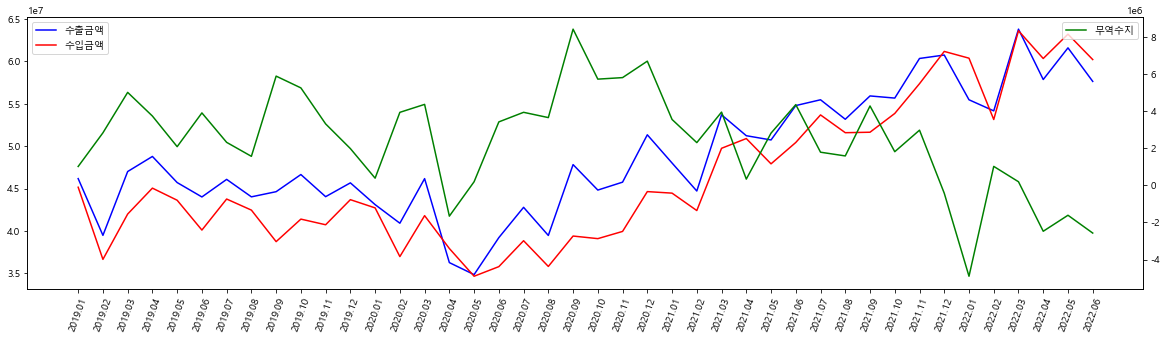

In [31]:
# 2중 y축
plt.rcParams['figure.figsize'] = (20, 5)
plt.rcParams['axes.unicode_minus'] = False # 레이블에 '-'부호가 깨지는 현상 방지
fig, ax1 = plt.subplots()
plt.xticks(rotation=70)
ax1.plot(df2['기간'],df2['수출금액'],color='blue')
ax1.plot(df2['기간'],df2['수입금액'],color='red')
ax1.legend(['수출금액','수입금액'])

ax2 = ax1.twinx()

ax2.plot(df2['기간'],df2['무역수지'],color='green')
ax2.legend(['무역수지'])

## 환율

In [32]:
ratio=pd.read_csv('./Data/주요국 통화의 대원화환율_19143334.csv')
ratio.rename(columns={'변환':'날짜','원자료':'환율'},inplace=True)
ratio

,날짜,환율
0,2019/01/02,"1,118.10"
1,2019/01/03,"1,119.00"
2,2019/01/04,"1,127.50"
3,2019/01/07,"1,125.20"
4,2019/01/08,"1,118.00"
...,...,...
861,2022/06/24,"1,300.70"
862,2022/06/27,"1,299.40"
863,2022/06/28,"1,285.60"
864,2022/06/29,"1,284.90"


In [33]:
for i in range(ratio.shape[0]):
    ratio['환율'][i]=ratio['환율'][i].replace(',','')
ratio['환율']=pd.to_numeric(ratio['환율'])

In [34]:
Y_list=[]
M_list=[]
for i in range(ratio.shape[0]):
    Y_list.append(ratio['날짜'][i].split('/')[0])
    M_list.append(ratio['날짜'][i].split('/')[1])

ratio['Y']=Y_list
ratio['M']=M_list
ratio_group=ratio.groupby(['Y','M'])

In [35]:
#ratio['날짜'] = pd.to_datetime(ratio['날짜'])

# for i in range(ratio.shape[0]):
#     ratio['기간'][i]=str(ratio['날짜'].dt.year)[i]+'.'+str(ratio['날짜'].dt.month)[i]

#ratio['기간'] = str(ratio['날짜'].dt.year)+'.'+str(ratio['날짜'].dt.month)
ratio

,날짜,환율,Y,M
0,2019/01/02,1118.1,2019,01
1,2019/01/03,1119.0,2019,01
2,2019/01/04,1127.5,2019,01
3,2019/01/07,1125.2,2019,01
4,2019/01/08,1118.0,2019,01
...,...,...,...,...
861,2022/06/24,1300.7,2022,06
862,2022/06/27,1299.4,2022,06
863,2022/06/28,1285.6,2022,06
864,2022/06/29,1284.9,2022,06


In [36]:
ratio_M=round(ratio_group.mean(),2)

ratio_date=[]
for i in range(ratio_M.shape[0]):
    ratio_date.append('.'.join(list(ratio_M.index[i])))


ratio_M.insert(0,'기간',ratio_date)

ratio_M.reset_index(drop=True,inplace=True)


ratio_M

,기간,환율
0,2019.01,1122.00
1,2019.02,1122.45
2,2019.03,1130.72
3,2019.04,1140.95
4,2019.05,1183.29
5,2019.06,1175.62
6,2019.07,1175.31
7,2019.08,1208.98
8,2019.09,1197.55
9,2019.10,1184.13


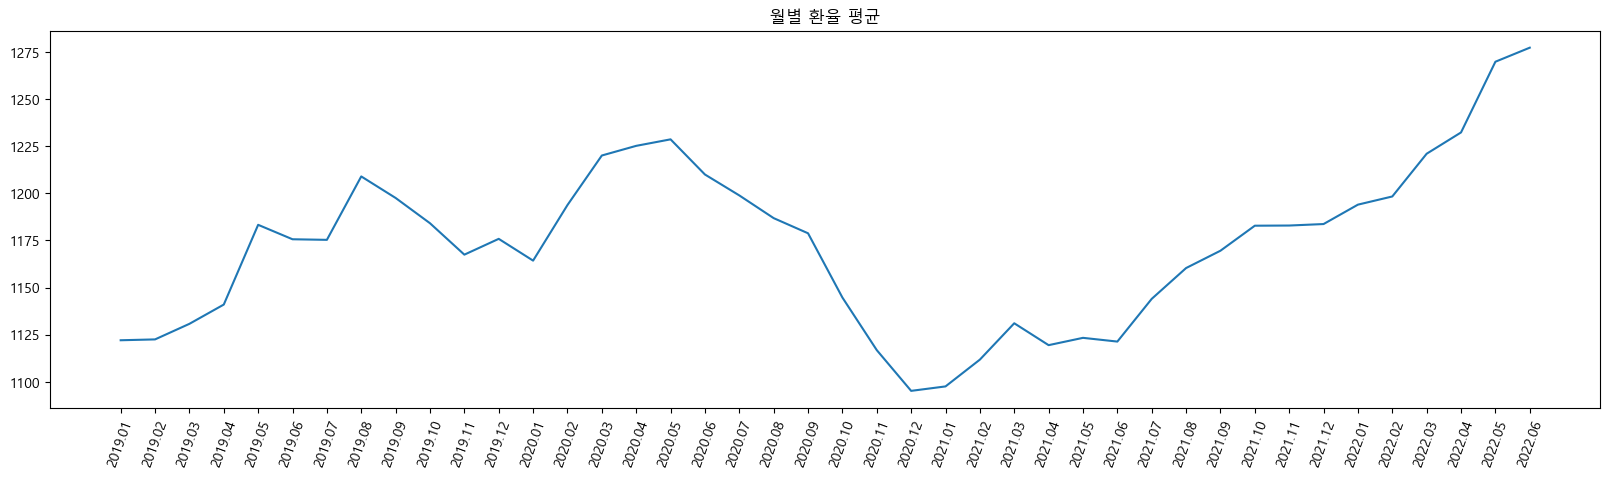

In [37]:
plt.figure(dpi=100,figsize=(20,5))
# plt.rcParams['axes.unicode_minus'] = False # -부호

plt.title("월별 환율 평균")

plt.plot(ratio_M['기간'],ratio_M['환율'])
plt.xticks(rotation=70)
# plt.legend(['수출금액','수입금액','무역수지'])
plt.show()

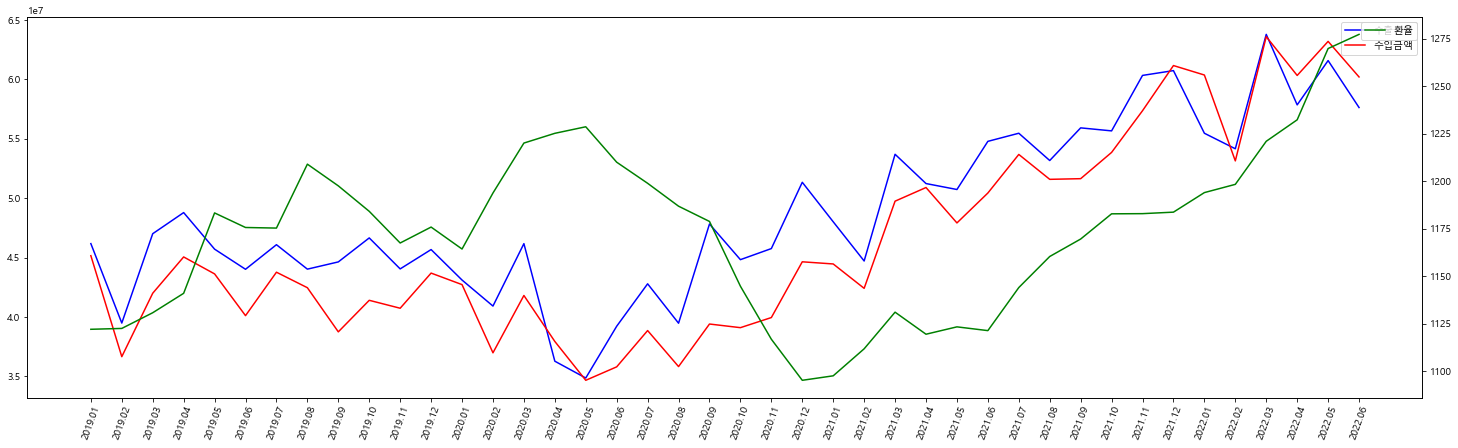

In [38]:
# 2중 y축 환율,수출
plt.rcParams['figure.figsize'] = (25, 7)
#plt.rcParams['axes.unicode_minus'] = False # 레이블에 '-'부호가 깨지는 현상 방지

fig, ax1 = plt.subplots()
plt.xticks(rotation=70)
ax1.plot(df2['기간'],df2['수출금액'],color='blue')
ax1.plot(df2['기간'],df2['수입금액'],color='red')
ax1.legend(['수출금액','수입금액'])

ax2 = ax1.twinx()

ax2.plot(ratio_M['기간'],ratio_M['환율'],color='green')
ax2.legend(['환율'],loc="upper right")

### 미국금리

In [39]:
rate=pd.read_csv('./Data/미국금리_월.csv',encoding='euc_kr')
rate.drop(rate.index[-1],inplace=True)
rate.drop(columns='이전',inplace=True)
rate.rename(columns={'날짜':'기간','실제':'금리'}, inplace=True)


In [40]:
for i in range(rate.shape[0]):
    rate['기간'][i]=rate['기간'][i].replace('-','.')

rate['금리']=rate['금리'].apply(lambda x:x[:-1])
rate['금리']=rate['금리'].apply(lambda x:float(x))
rate

,기간,금리
0,2019.01,2.50
1,2019.02,2.50
2,2019.03,2.50
3,2019.04,2.50
4,2019.05,2.50
5,2019.06,2.50
6,2019.07,2.50
7,2019.08,2.25
8,2019.09,2.25
9,2019.10,2.00


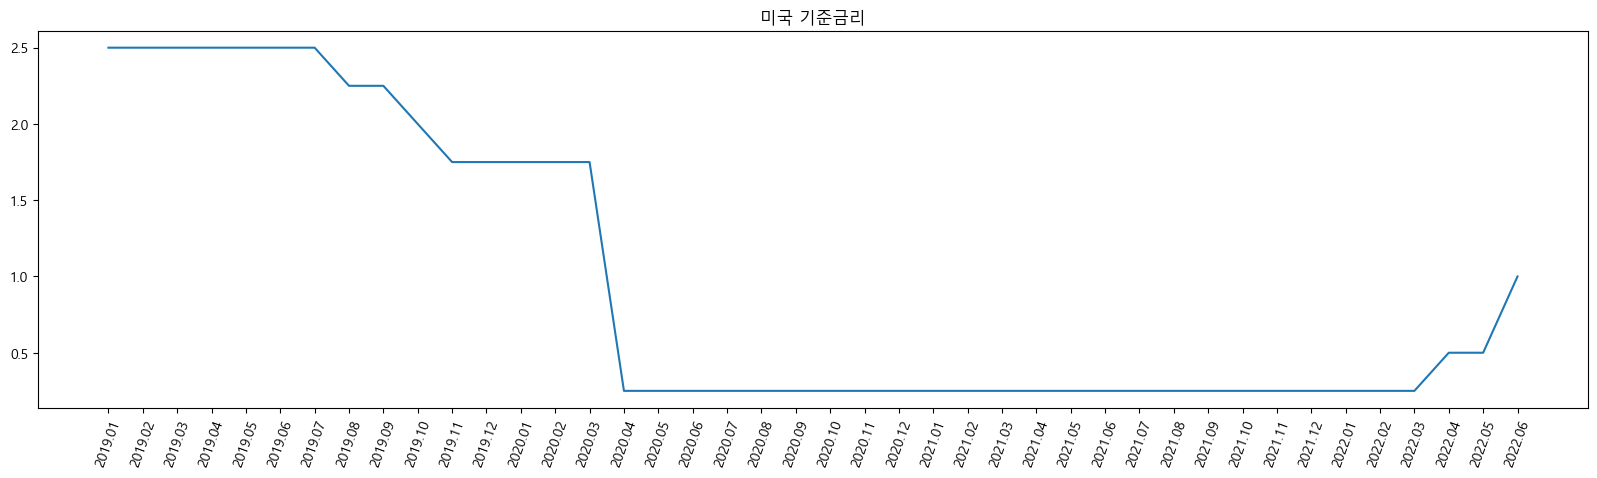

In [41]:
plt.figure(dpi=100,figsize=(20,5))
plt.title("미국 기준금리")
plt.plot(rate['기간'],rate['금리'])
plt.xticks(rotation=70)
plt.show()

In [42]:
# 금리 rate// 수출입 df2 // 환율 ratio_M

### DF 합치기

In [50]:
DF=pd.concat([rate,df2,ratio_M],axis=1)
DF=DF.T.drop_duplicates().T
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기간      42 non-null     object
 1   금리      42 non-null     object
 2   수출금액    42 non-null     object
 3   수입금액    42 non-null     object
 4   무역수지    42 non-null     object
 5   환율      42 non-null     object
dtypes: object(6)
memory usage: 2.1+ KB


In [49]:
DF.to_csv('금리 수출입 환율.csv')